In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the CSV file
df = pd.read_csv('in-vehicle-coupon-recommendation.csv')

In [7]:
# Basic data exploration
print("Dataset shape:", df.shape)

Dataset shape: (12684, 26)


In [11]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                 

In [13]:
print("\nData types and missing values:")
print(df.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar 

In [15]:
print("\nSummary statistics:")
print(df.describe(include='all'))


Summary statistics:
            destination passanger weather   temperature   time        coupon  \
count             12684     12684   12684  12684.000000  12684         12684   
unique                3         4       3           NaN      5             5   
top     No Urgent Place     Alone   Sunny           NaN    6PM  Coffee House   
freq               6283      7305   10069           NaN   3230          3996   
mean                NaN       NaN     NaN     63.301798    NaN           NaN   
std                 NaN       NaN     NaN     19.154486    NaN           NaN   
min                 NaN       NaN     NaN     30.000000    NaN           NaN   
25%                 NaN       NaN     NaN     55.000000    NaN           NaN   
50%                 NaN       NaN     NaN     80.000000    NaN           NaN   
75%                 NaN       NaN     NaN     80.000000    NaN           NaN   
max                 NaN       NaN     NaN     80.000000    NaN           NaN   

       expiration 

In [17]:
# Check for missing valuesAC
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [21]:
# 2. Handle missing values
# For numerical columns - fill with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

In [23]:
# For categorical columns - fill with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [25]:
# For binary columns (0/1) - fill with most frequent value
binary_cols = ['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 
               'direction_same', 'direction_opp']
for col in binary_cols:
    if col in df.columns and df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [27]:
# 3. Verify missing values are handled
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


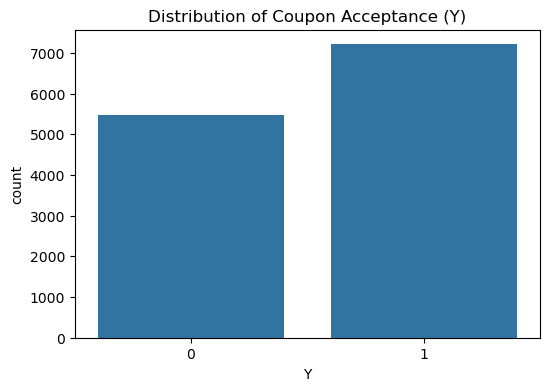

In [29]:
# Visualize target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Y', data=df)
plt.title('Distribution of Coupon Acceptance (Y)')
plt.show()

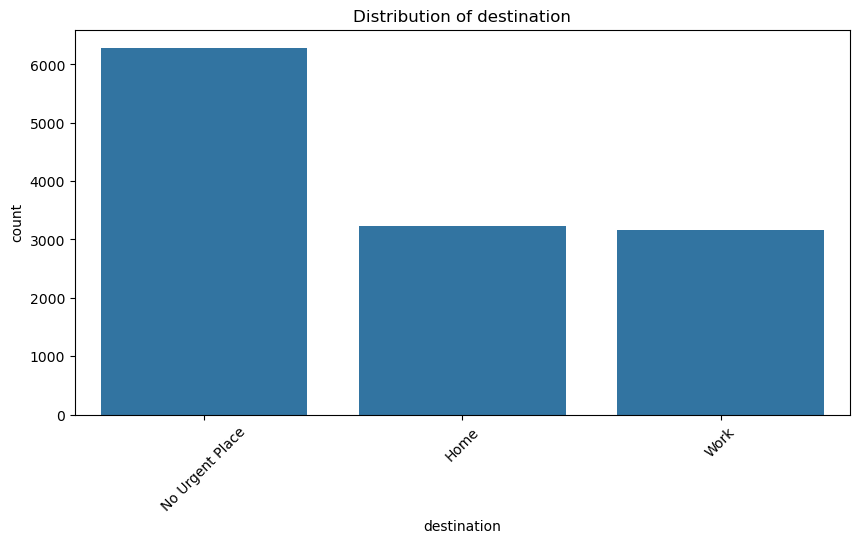

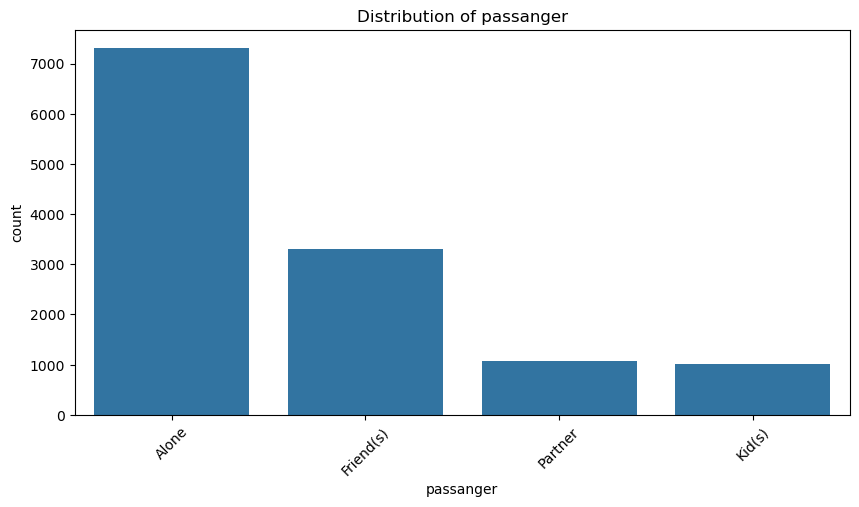

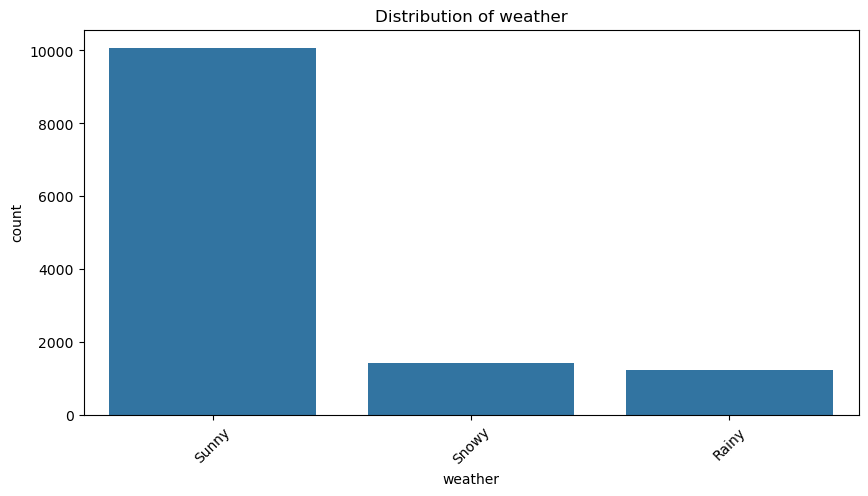

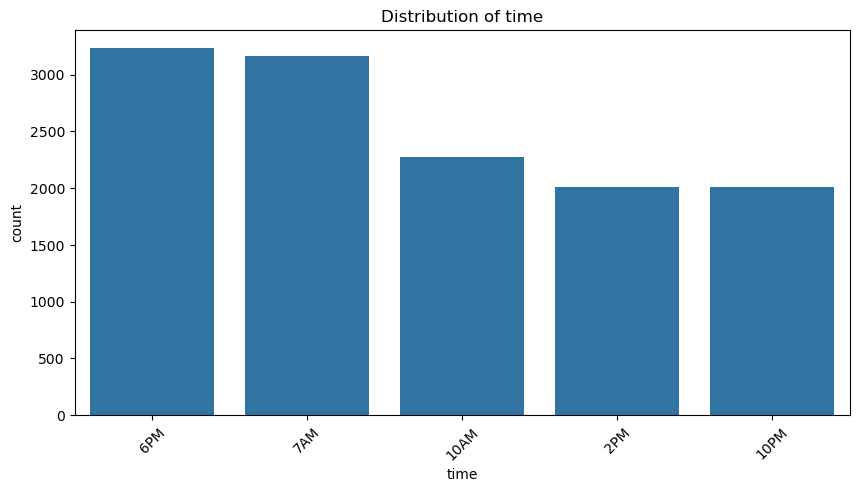

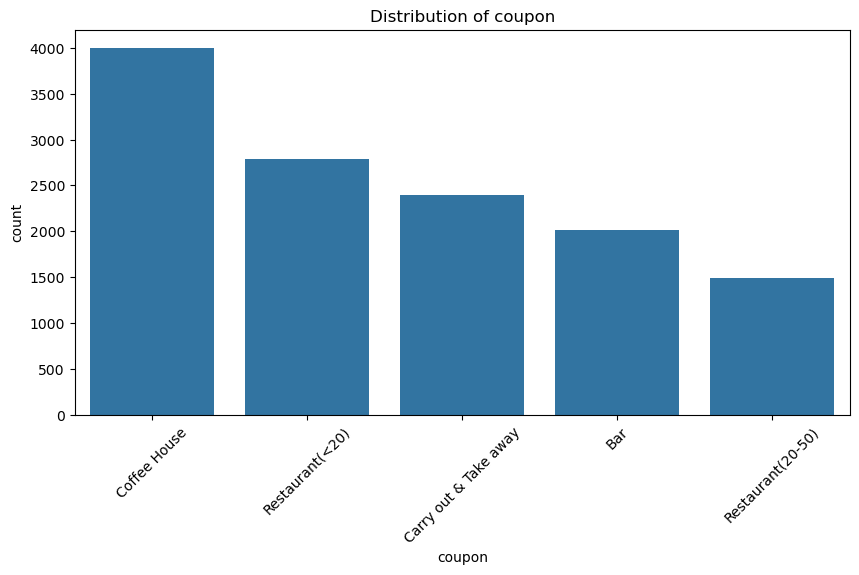

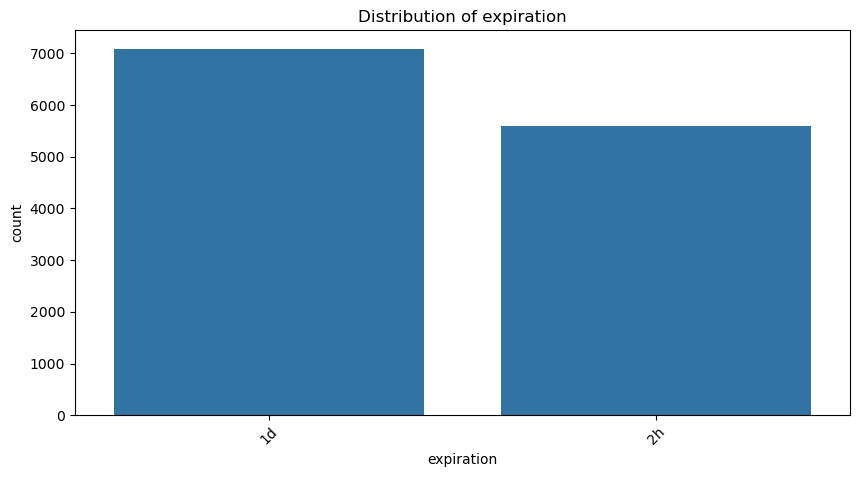

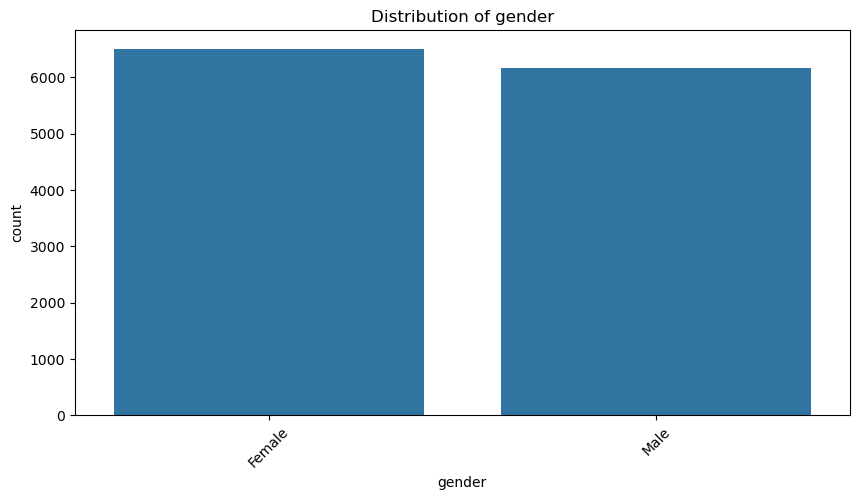

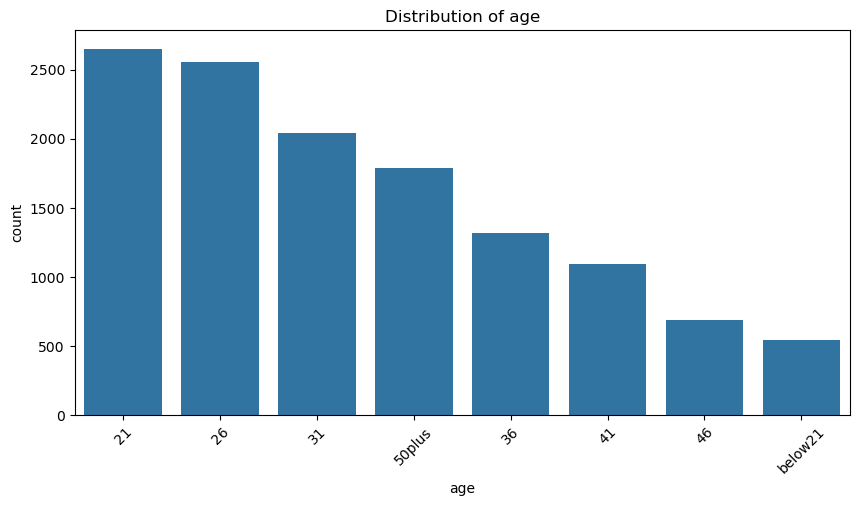

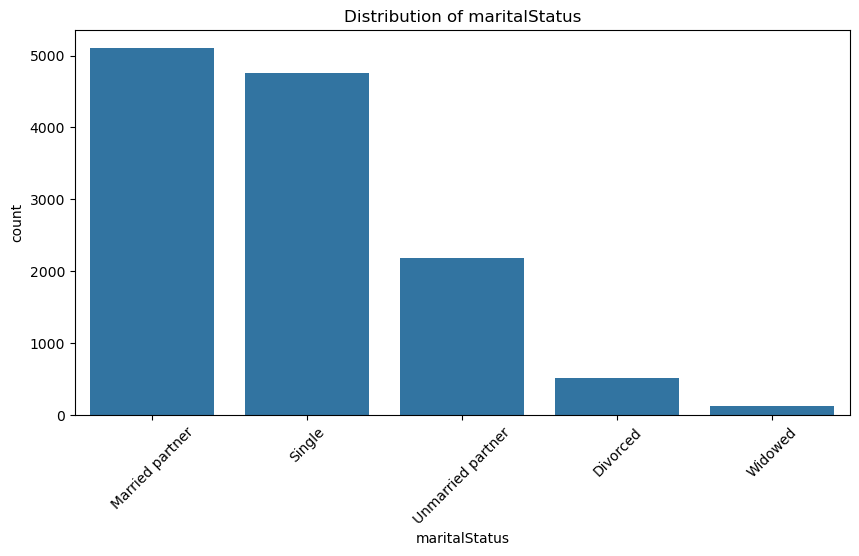

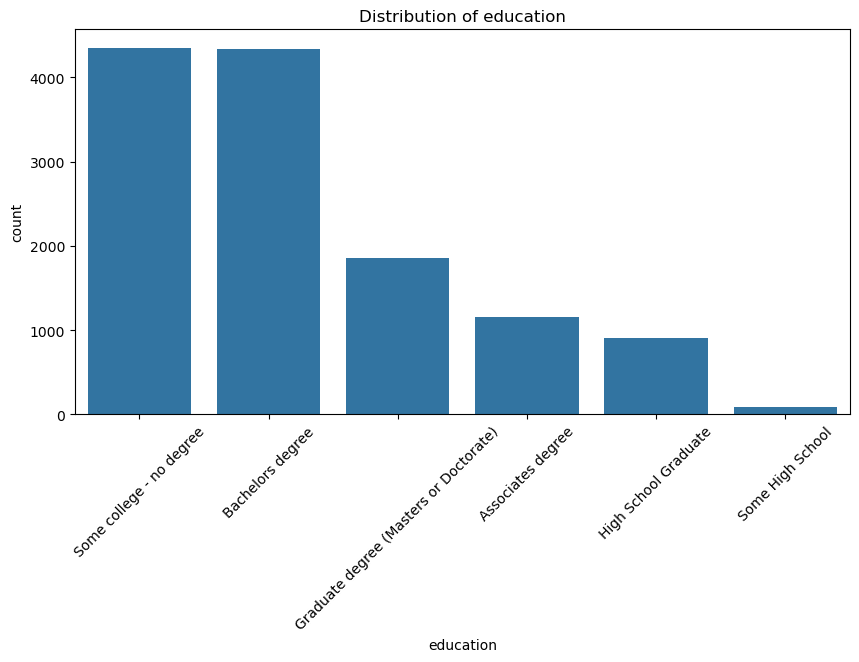

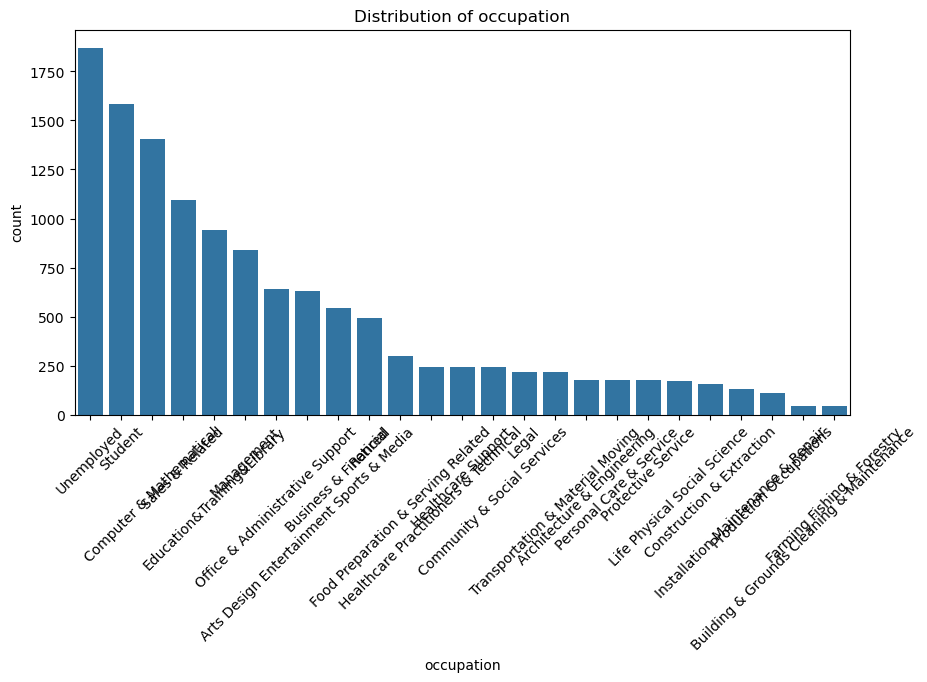

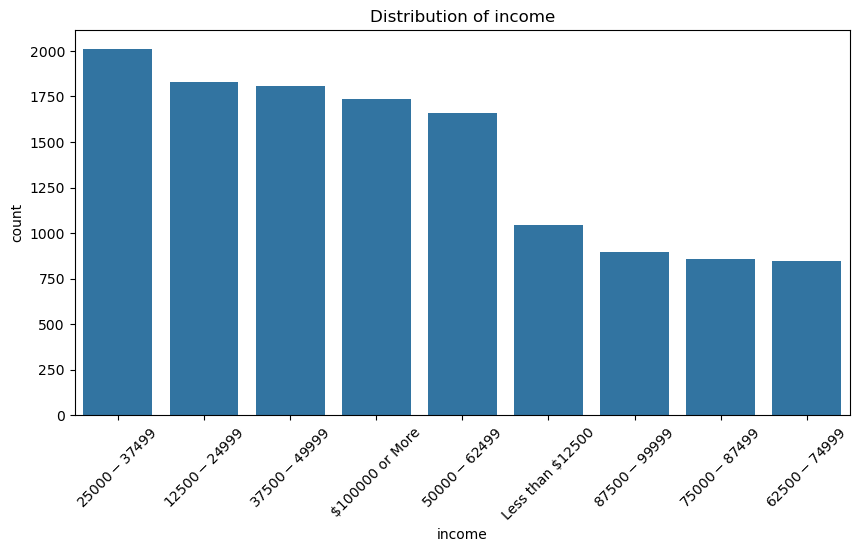

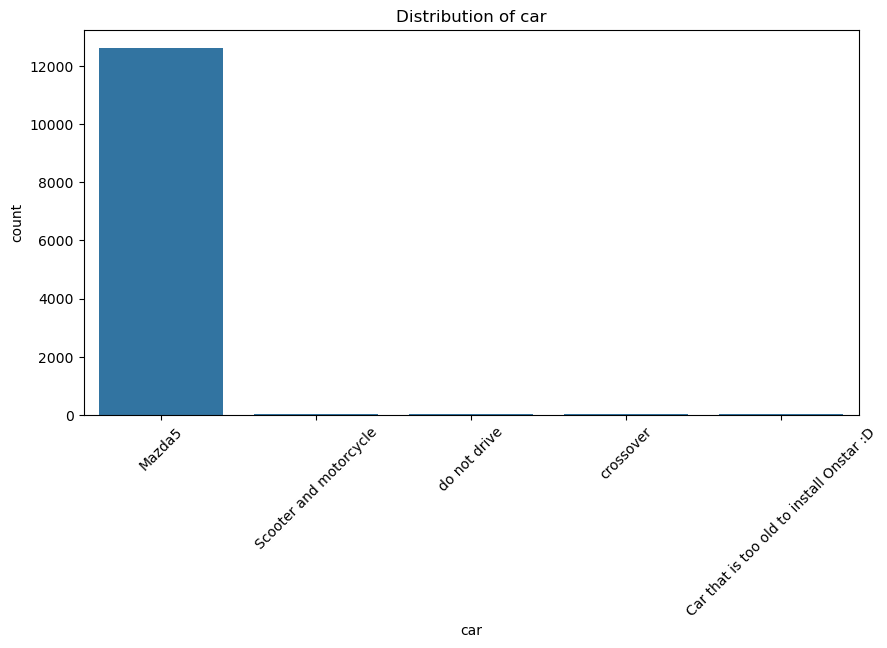

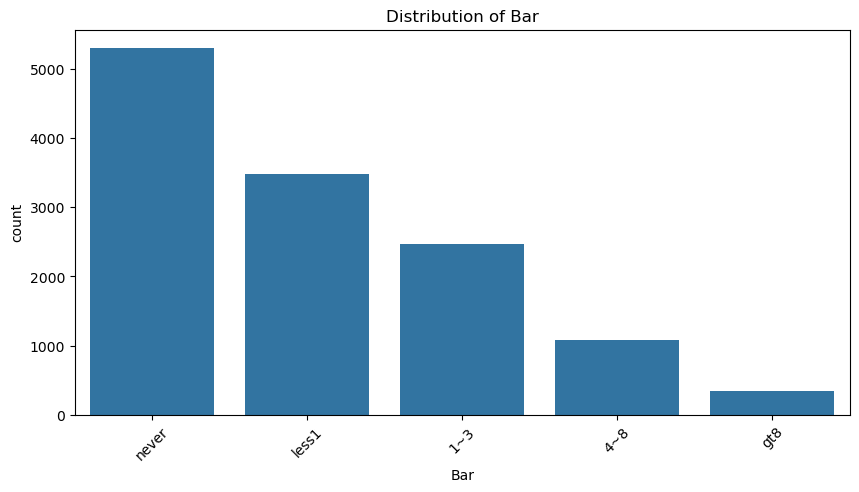

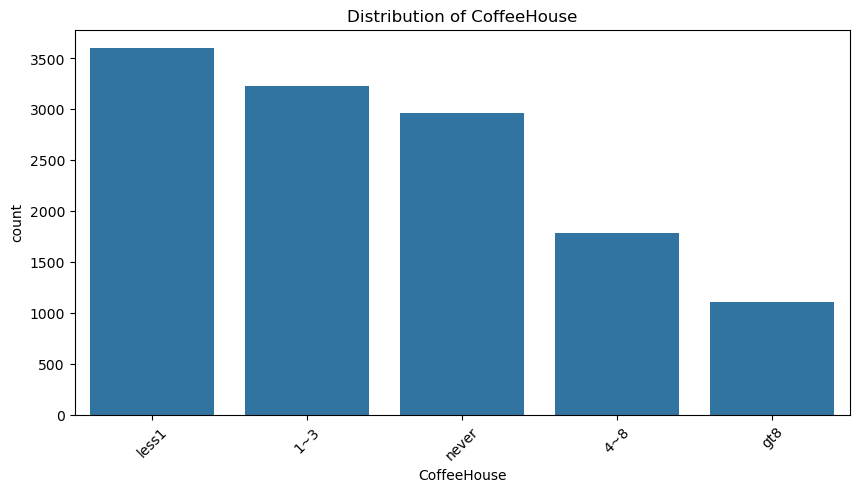

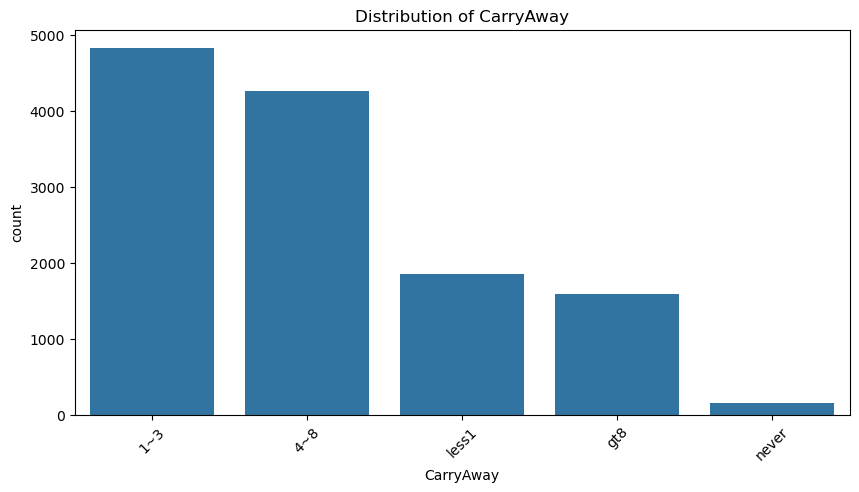

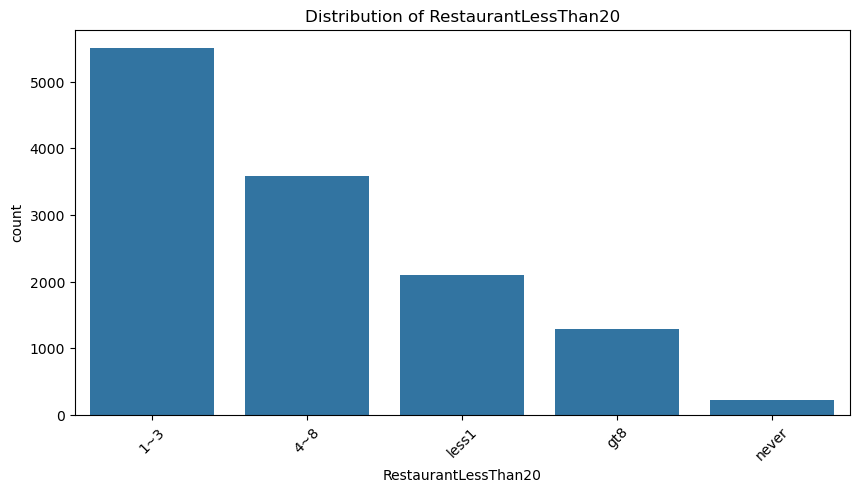

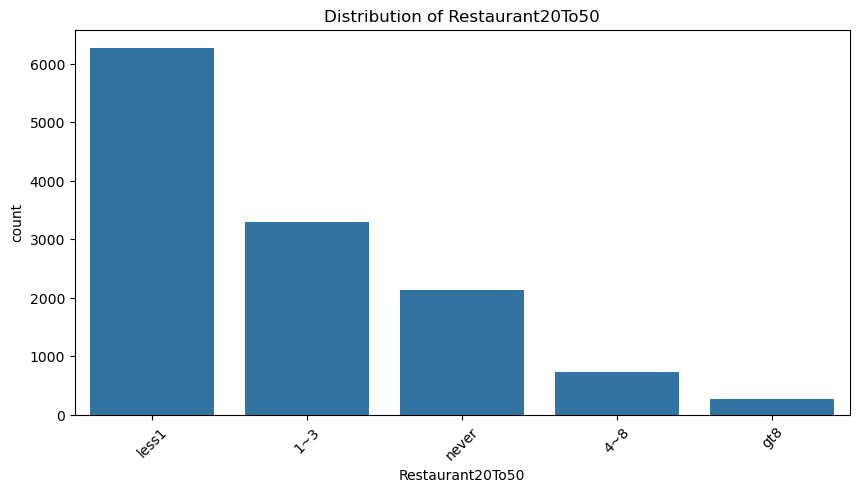

In [31]:
# Analyze categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.show()

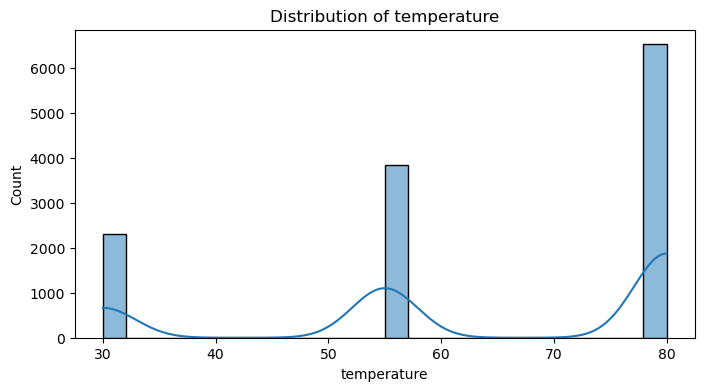

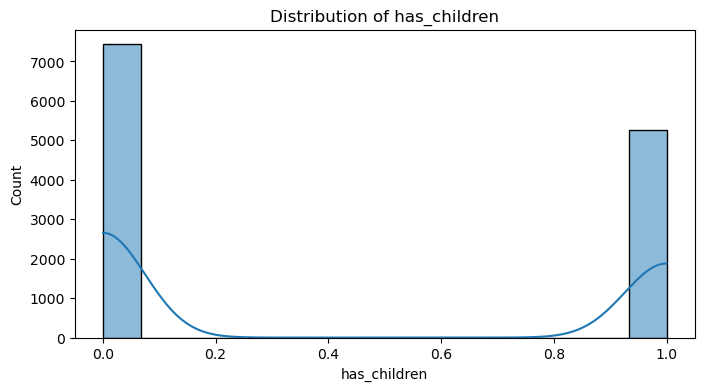

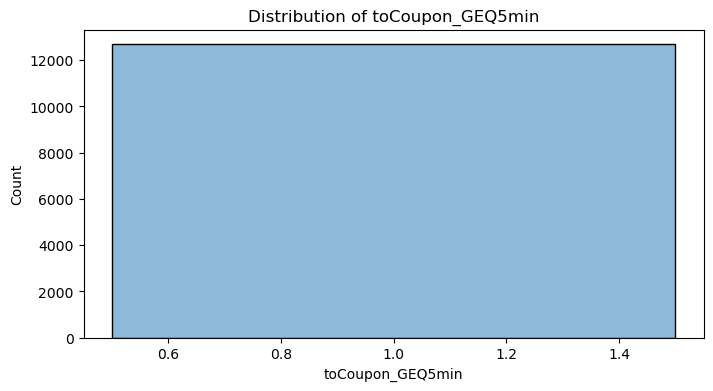

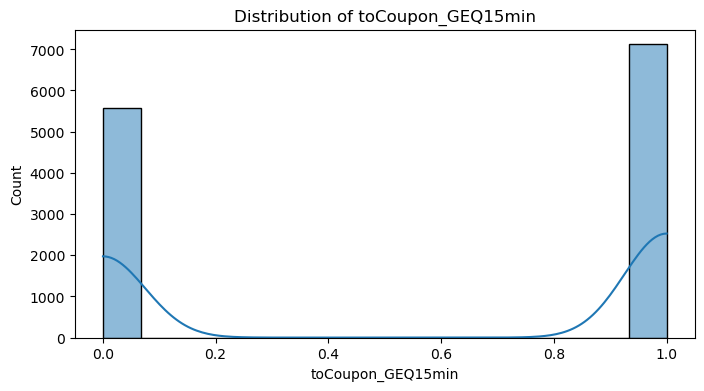

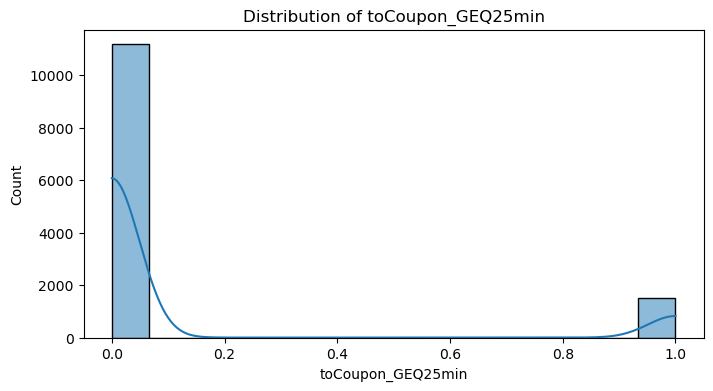

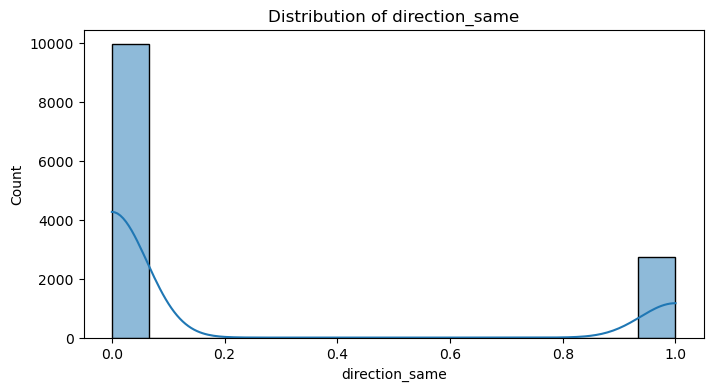

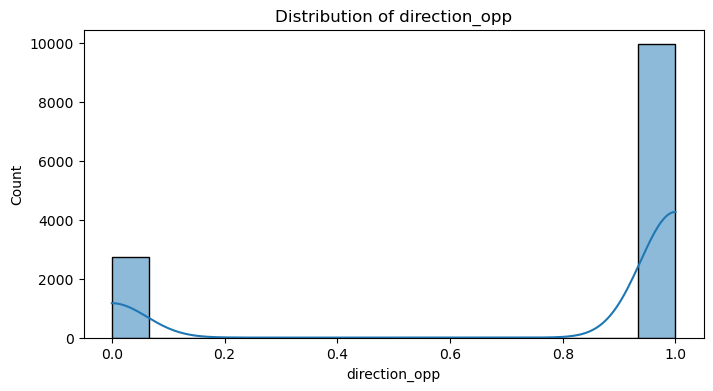

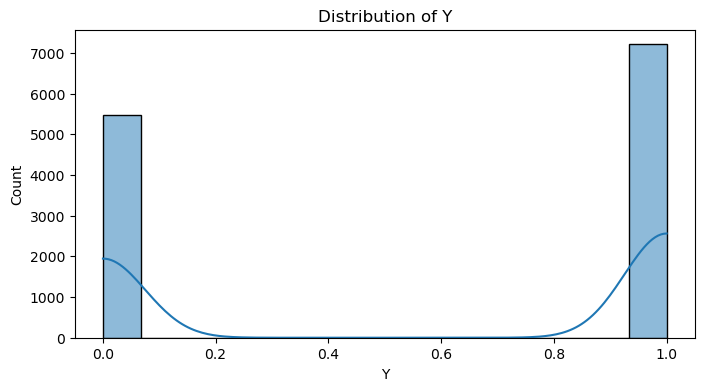

In [33]:
# Analyze numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

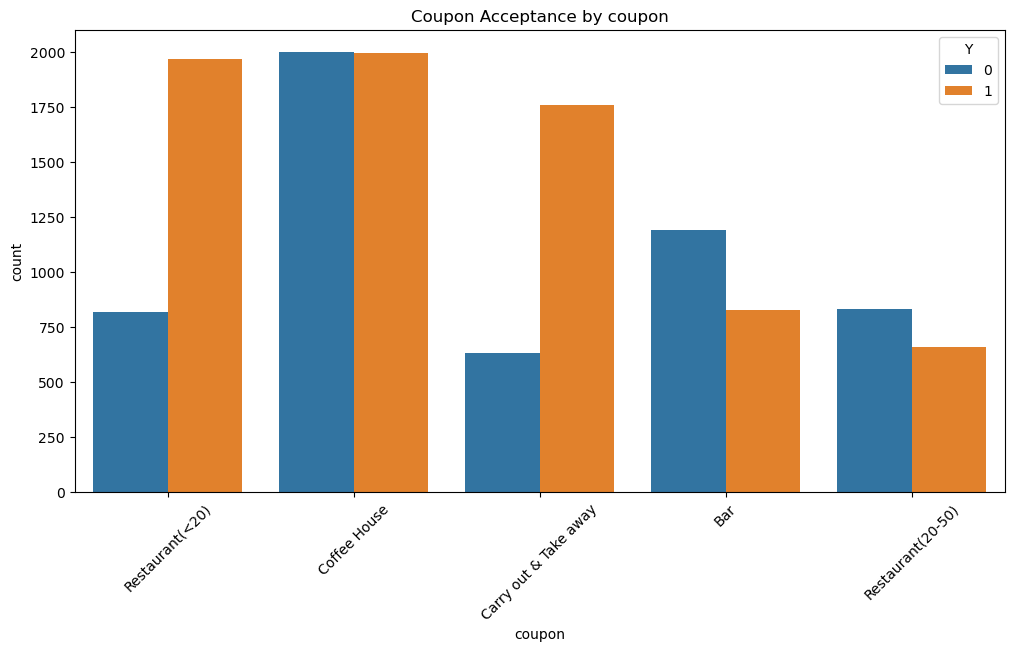

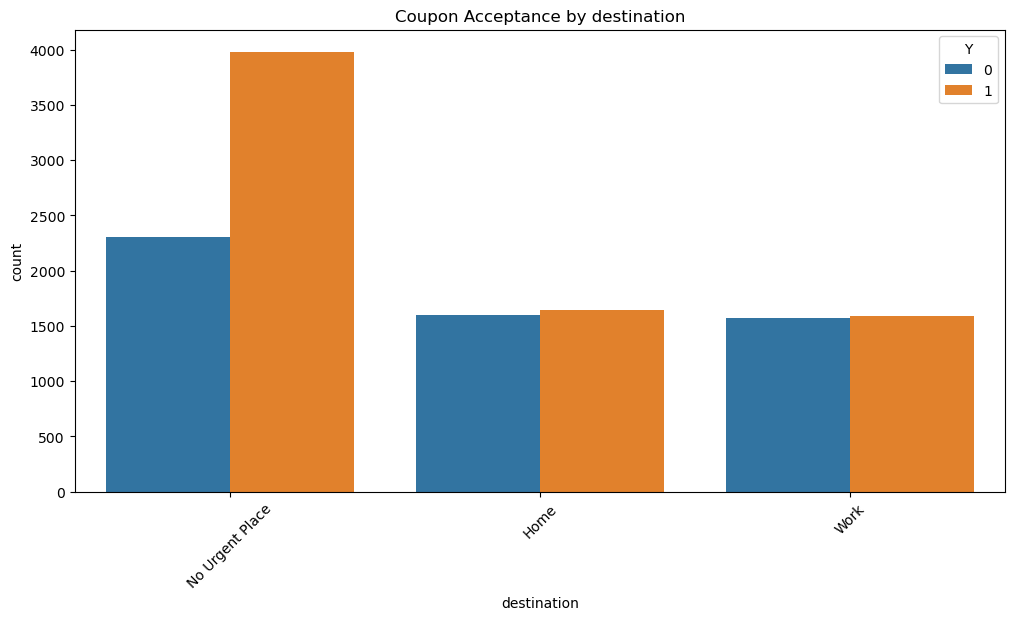

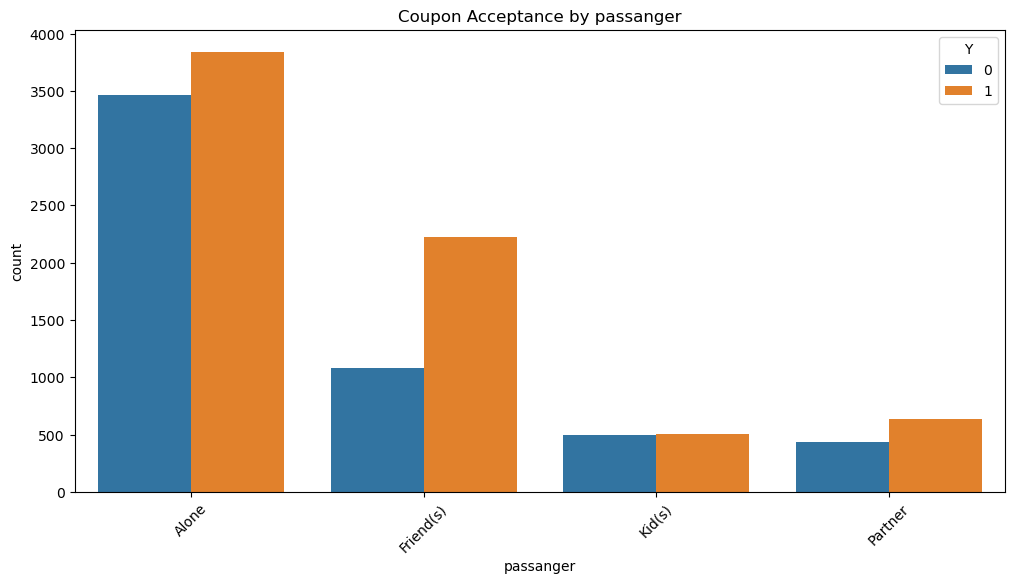

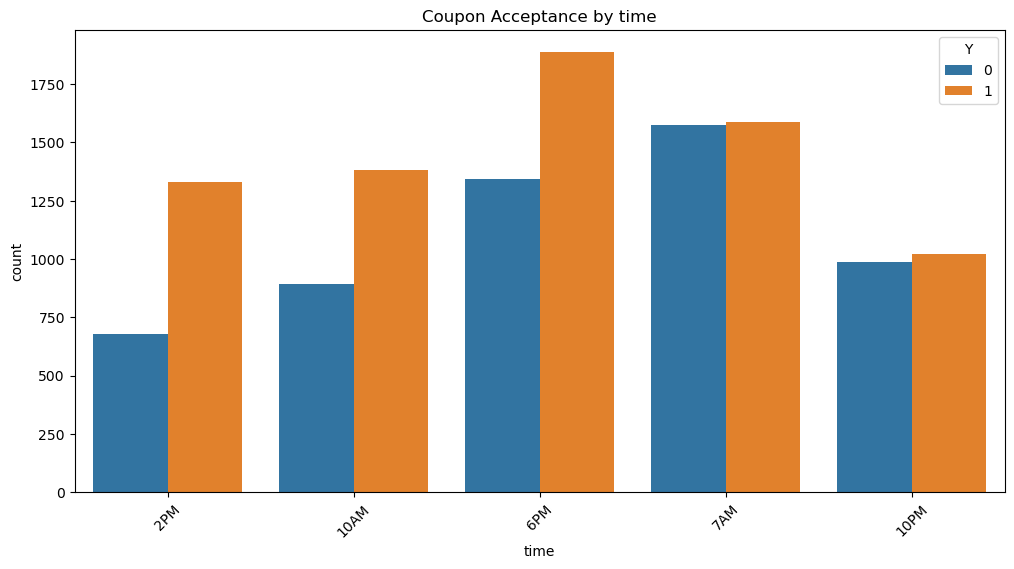

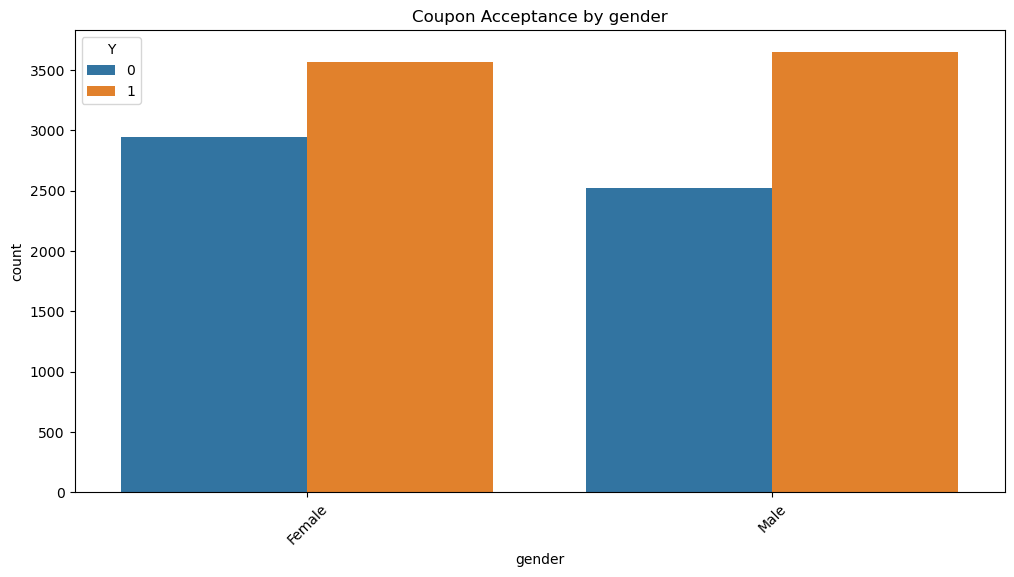

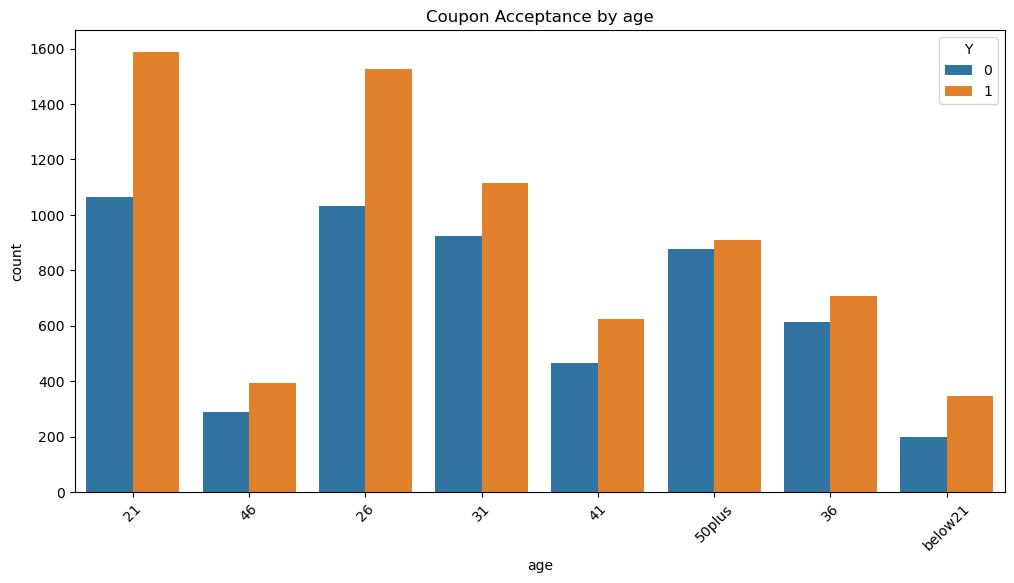

In [37]:
# Analyze coupon acceptance by different categories
for col in ['coupon', 'destination', 'passanger', 'time', 'gender', 'age']:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, hue='Y', data=df)
    plt.xticks(rotation=45)
    plt.title(f'Coupon Acceptance by {col}')
    plt.show()

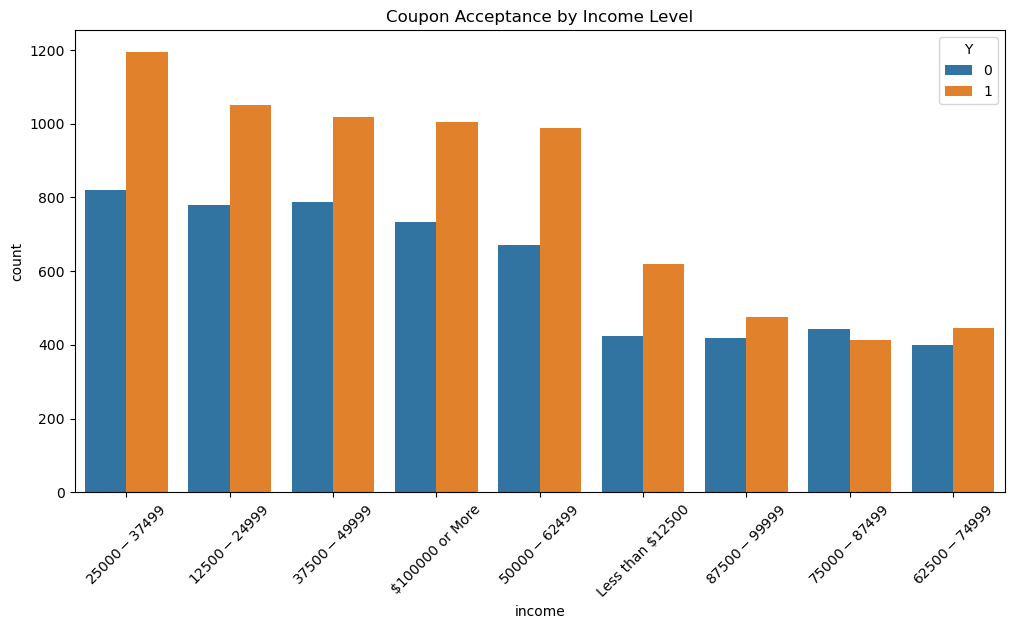

In [39]:
# Analyze income vs coupon acceptance
plt.figure(figsize=(12, 6))
sns.countplot(x='income', hue='Y', data=df, order=df['income'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Coupon Acceptance by Income Level')
plt.show()

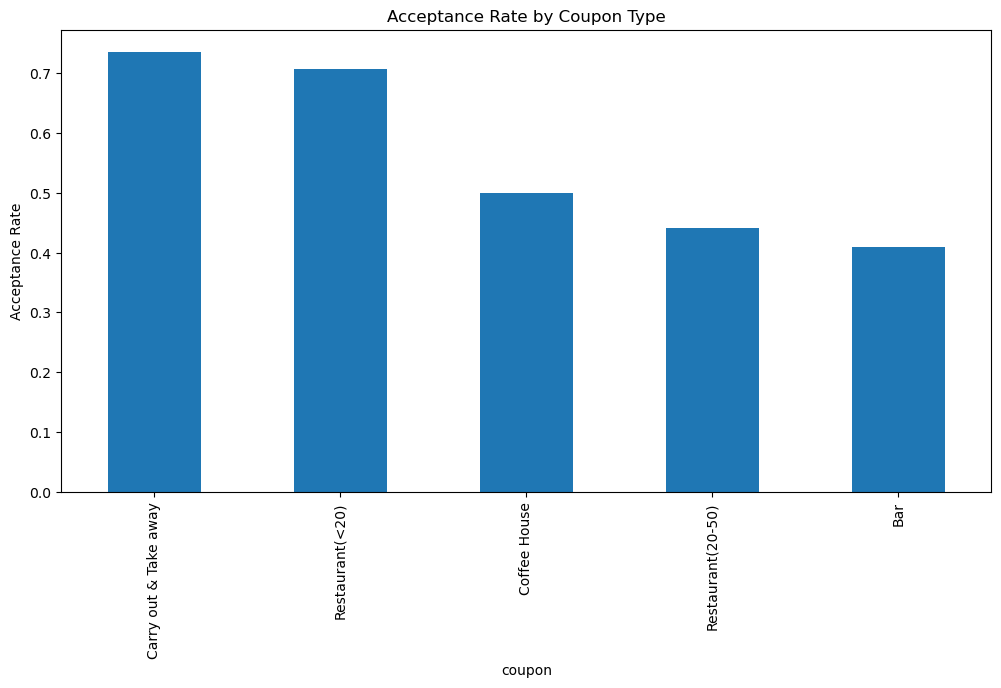

In [41]:
# Analyze coupon type vs acceptance
coupon_acceptance = df.groupby('coupon')['Y'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
coupon_acceptance.plot(kind='bar')
plt.title('Acceptance Rate by Coupon Type')
plt.ylabel('Acceptance Rate')
plt.show()

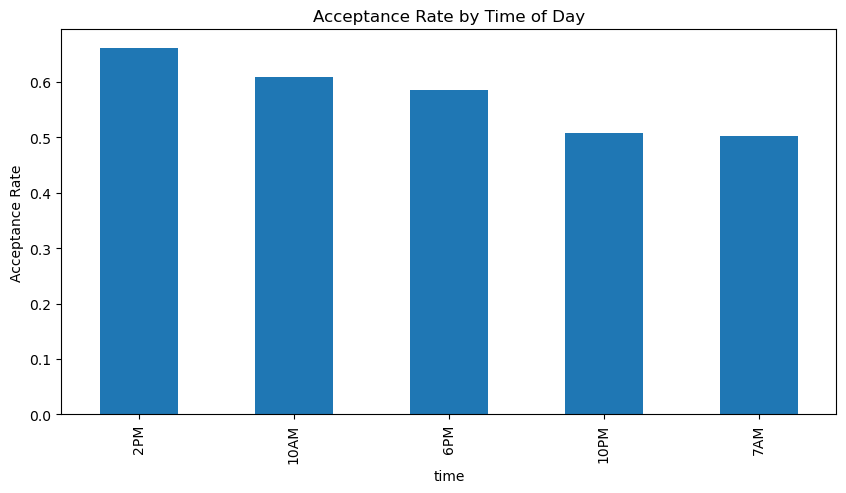

In [43]:
# Analyze time of day vs coupon acceptance
time_acceptance = df.groupby('time')['Y'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
time_acceptance.plot(kind='bar')
plt.title('Acceptance Rate by Time of Day')
plt.ylabel('Acceptance Rate')
plt.show()